### Notebook по курсу ["Введение в машинное обучение"](https://stepik.org/course/4852)

### Модуль 1.4 Pandas, DataFrames

In [8]:
import pandas as pd
import numpy as np

#### Чтение CSV файла

In [9]:
students_perfomance = pd.read_csv("https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv")

In [10]:
students_perfomance.head(3) #вывод 3 первых строк

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [11]:
students_perfomance.iloc[0:2, 0:5] #вывод 0-2 строк, по 0-5 столбцам

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed


In [12]:
students_perfomance.iloc[[1, 3, 5], [0, 5, 6]] #вывод 1, 3, 5 строк, по столбцам 0, 5, 6

,gender,math score,reading score
1,female,69,90
3,male,47,57
5,female,71,83


In [13]:
students_perfomance_with_names = students_perfomance.iloc[[0, 3, 4]]

In [14]:
students_perfomance_with_names

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
#присвоить индексы
students_perfomance_with_names.index = ['Sultan', 'Madina', 'Amina']

In [16]:
#вывод по названию индекса и столбцов
students_perfomance_with_names.loc[['Sultan', 'Madina'], ['gender']]

,gender
Sultan,female
Madina,male


### Задача из модуля (шаг - 10)

In [29]:
titanic_passengers = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

In [35]:
#кортеж (кол-во строк, кол-во столбцов)
titanic_passengers.shape

(891, 12)

In [38]:
#вывод кол-во столбцов по типу данных
titanic_passengers.get_dtype_counts()

float64    2
int64      5
object     5
dtype: int64

### Модуль 1.5 Фильтрация данных

In [1]:
import pandas as pd
import numpy as np

In [68]:
students_perfomance = pd.read_csv("https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv")

У *DataFrame* есть атрибута *loc*, который поддерживает также *boolean array*, например __df.loc[[True, False]]__

Выберем данные где, пол равен __female__

In [18]:
# students_perfomance.gender - Pandas Series
# students_perfomance['gender'] - Pandas Series

#students_perfomance.gender == 'female' 
query = students_perfomance['gender'] == 'female' #все pandas series и сравнить ее с некоторым значением
# query - Pandas Series, из True и False
#students_perfomance[query].head(5) 
# Можем обратиться по loc или как словарю
students_perfomance.loc[query].head(5)
students_perfomance.loc[query, ['gender', 'reading score']].head(5) # Можем выбрать и разные слобцы

,gender,reading score
0,female,72
1,female,90
2,female,95
5,female,83
6,female,95


In [26]:
# Посмотреть среднее значение
students_perfomance.loc[:,'writing score'].mean()

#или

mean_writing_score = students_perfomance['writing score'].mean()
mean_writing_score

68.054

In [28]:
students_perfomance.loc[students_perfomance['writing score'] > mean_writing_score].head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78


##### Комбинация условий для фильтрации

Выражения в Pandas, *and* - __&__, *or* - __|__

In [29]:
query = (students_perfomance['writing score'] > mean_writing_score) & (students_perfomance['gender'] == 'female')

students_perfomance.loc[query].head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


#### Фильтрация через query

In [69]:
# переименуем колонки для удобной фильтрации

students_perfomance.columns = [x.replace(' ', '_') for x in students_perfomance]
students_perfomance.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [71]:
students_perfomance.query("writing_score > 74").head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [74]:
students_perfomance.query("writing_score > 74 & gender == 'male'").head() #комбинированное условие

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
4,male,group C,some college,standard,none,76,78,75
16,male,group C,high school,standard,none,88,89,86
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80
34,male,group E,some college,standard,none,97,87,82
35,male,group E,associate's degree,standard,completed,81,81,79


In [75]:
writing_score_query = 80

students_perfomance.query("writing_score > @writing_score_query").head() #фильтрация через переменную

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
16,male,group C,high school,standard,none,88,89,86
34,male,group E,some college,standard,none,97,87,82


#### Отобрать колонки по каким нибудь признакам

In [80]:
#по питоновски

column_names = list(students_perfomance)
column_names #список наименований столбцов

score_columns = [i for i in list(students_perfomance) if 'score' in i]
students_perfomance[score_columns].head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [ ]:
#по Pandas

s = students_perfomance.filter(like='score')
s.head()

#s = students_perfomance.filter(like='row_name', axis=0) #axis = 0 - фильтрация по строкам
#s.head()

### Задача из модуля (шаг - 6)

У какой доли студентов из [датасэта]('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv') в колонке lunch указано free/reduced?

Формат ответа десятичная дробь, например, 0.25

In [31]:
import pandas as pd

df = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')

__Вариант по питоновски__

In [40]:
query = df['lunch'] == 'free/reduced'
free_reduced_count = df.loc[query].shape[0] #количество студентов (строк), где free/reduced
all_count = df.shape[0] #количество всех студентов

result = free_reduced_count / all_count
result

0.355

__Вариант со статистикой - Нормалицазия__

In [45]:
df['lunch'].value_counts()
df['lunch'].value_counts(normalize=True)

standard        0.645
free/reduced    0.355
Name: lunch, dtype: float64

### Задача из модуля (шаг - 7)

Как различается [среднее][1] и [дисперсия][2] оценок по предметам у групп [студентов][3] со стандартным или урезанным ланчем?

[1]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html
[2]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html
[3]: https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv

In [46]:
import pandas as pd

df = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')

In [48]:
df.describe() # показывает основные статистические характеристики

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Среднее оценок по предметам со стандартным обедом

In [59]:
query1 = df['lunch'] == 'standard'
df.loc[query1, ['lunch', 'math score', 'reading score', 'writing score']].mean()

math score       70.034109
reading score    71.654264
writing score    70.823256
dtype: float64

#### Среднее оценок по предметам со урезанным обедом

In [58]:
query2 = df['lunch'] == 'free/reduced'
df.loc[query2, ['lunch', 'math score', 'reading score', 'writing score']].mean()

math score       58.921127
reading score    64.653521
writing score    63.022535
dtype: float64

#### Дисперсия оценок по предметам со стандартным обедом

In [64]:
query1 = df['lunch'] == 'standard'
df.loc[query1, ['lunch', 'math score', 'reading score', 'writing score']].var()

math score       186.418089
reading score    191.285560
writing score    205.620887
dtype: float64

#### Дисперсия оценок по предметам со урезанным обедом

In [61]:
query2 = df['lunch'] == 'free/reduced'
df.loc[query2, ['lunch', 'math score', 'reading score', 'writing score']].var()

math score       229.824270
reading score    221.871139
writing score    238.202881
dtype: float64

### Модуль 1.6 Группировка данных и агрегация

In [3]:
import pandas as pd
import numpy as np

students_perfomance = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')

In [5]:
students_perfomance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
#посчитаем среднее score-ов в зависивости от полов студентов

students_perfomance.groupby('gender')
#результат сгруппированный DataFrame

In [15]:
students_perfomance.groupby('gender').mean() #пременили агрегацию mean
#среднее значение количественных переменных

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [18]:
#какие переменные использовать для агрегации
students_perfomance.groupby('gender').aggregate({'math score': 'mean'})

,math score
gender,
female,63.633205
male,68.728216


In [20]:
#можно также использовать несколько переменных
students_perfomance.groupby('gender').aggregate({'math score': 'mean', 'reading score': 'mean'})

,math score,reading score
gender,,
female,63.633205,72.608108
male,68.728216,65.473029


In [21]:
#в результате мы получаем DataFrame с индексами, которые мы использовали для группировки
students_perfomance.groupby('gender').aggregate({'math score': 'mean', 'reading score': 'mean'})

,math score,reading score
gender,,
female,63.633205,72.608108
male,68.728216,65.473029


In [23]:
#as_index=False, с другими индексами
students_perfomance.groupby('gender', as_index=False)\
    .aggregate({'math score': 'mean', 'reading score': 'mean'})

,gender,math score,reading score
0,female,63.633205,72.608108
1,male,68.728216,65.473029


In [24]:
students_perfomance.groupby('gender', as_index=False)\
    .aggregate({'math score': 'mean', 'reading score': 'mean'}) \
    .rename(columns = {'math score': 'mean_math_score', 'reading score': 'mean_reading_score'})

,gender,mean_math_score,mean_reading_score
0,female,63.633205,72.608108
1,male,68.728216,65.473029


##### Tips по комментариям
Кстати, если подавать значения для ключей в виде списка, то можно, во-первых, выводить несколько статистик для одной переменной, а, во-вторых, колонки будут иметь названия в соответствии со статистикой.
Вот такой код 

In [27]:
students_perfomance.groupby('gender', as_index=False)\
    .aggregate({'math score': ['mean', 'count', 'std'],'reading score': ['std', 'min', 'max']})

gender math score                  reading score         
                mean count        std           std min  max
0  female  63.633205   518  15.491453     14.378245  17  100
1    male  68.728216   482  14.356277     13.931832  23  100

In [29]:
students_perfomance.groupby('gender', as_index=False)\
    .aggregate({'math score': ['mean'],'reading score': ['std', 'min', 'max']})

gender math score reading score         
                mean           std min  max
0  female  63.633205     14.378245  17  100
1    male  68.728216     13.931832  23  100

#### Группировать по нескольким переменным

In [33]:
students_perfomance.groupby(['gender', 'lunch'], as_index=False)\
    .aggregate({'math score': 'mean', 'reading score': 'mean'}) \
    .rename(columns = {'math score': 'mean_math_score', 'reading score': 'mean_reading_score'})

,gender,lunch,mean_math_score,mean_reading_score
0,female,free/reduced,55.814815,67.386243
1,female,standard,68.124620,75.607903
2,male,free/reduced,62.457831,61.542169
3,male,standard,72.022152,67.537975


In [34]:
students_perfomance.groupby(['gender', 'lunch'])\
    .aggregate({'math score': 'mean', 'reading score': 'mean'}) \
    .rename(columns = {'math score': 'mean_math_score', 'reading score': 'mean_reading_score'})

#сложно составной индекс

mean_math_score  mean_reading_score
gender lunch                                            
female free/reduced        55.814815           67.386243
       standard            68.124620           75.607903
male   free/reduced        62.457831           61.542169
       standard            72.022152           67.537975

In [35]:
mean_scores = students_perfomance.groupby(['gender', 'lunch'])\
    .aggregate({'math score': 'mean', 'reading score': 'mean'}) \
    .rename(columns = {'math score': 'mean_math_score', 'reading score': 'mean_reading_score'})


In [36]:
#мульти индекс, состаящий из нескольких уровней
mean_scores.index

MultiIndex(levels=[['female', 'male'], ['free/reduced', 'standard']],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=['gender', 'lunch'])

In [39]:
mean_scores.loc[[('female', 'standard')]]

,,mean_math_score,mean_reading_score
gender,lunch,,
female,standard,68.12462,75.607903


Преимущество мульти индекса

In [47]:
#сгруппировать по 2ув переменным
students_perfomance.groupby(['gender', 'race/ethnicity'])['math score'].unique()

gender  race/ethnicity
female  group A           [50, 55, 41, 58, 51, 44, 71, 38, 49, 59, 47, 7...
        group B           [72, 90, 71, 88, 38, 65, 18, 63, 53, 47, 79, 5...
        group C           [69, 54, 67, 58, 66, 71, 33, 0, 60, 39, 73, 76...
        group D           [62, 69, 74, 50, 75, 57, 59, 58, 61, 71, 73, 6...
        group E           [56, 50, 82, 62, 63, 99, 42, 66, 75, 81, 83, 4...
male    group A           [47, 78, 73, 39, 62, 80, 50, 54, 57, 77, 72, 6...
        group B           [40, 69, 57, 59, 65, 67, 61, 44, 49, 79, 60, 9...
        group C           [76, 58, 88, 46, 70, 55, 82, 53, 61, 49, 27, 7...
        group D           [64, 40, 66, 44, 74, 88, 52, 58, 45, 63, 42, 6...
        group E           [97, 81, 53, 77, 79, 30, 72, 66, 83, 87, 70, 1...
Name: math score, dtype: object

In [49]:
#получим топ 5 студентов по математики (male/female)

students_perfomance.sort_values(['gender', 'math score'], ascending=False) #сортировка

students_perfomance.sort_values(['gender', 'math score'], ascending=False) \
    .groupby('gender').head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90


#### Tips с комментов
Если хочется отсортировать, например, в порядке возрастания по одной переменной, и в порядке убывания по другой, то достаточно лишь передать в аргумент ascending соответствующий лист:

In [52]:
students_perfomance.sort_values(['reading score', 'math score'], ascending=[True, False]).head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
327,male,group A,some college,free/reduced,none,28,23,19
596,male,group B,high school,free/reduced,none,30,24,15
980,female,group B,high school,free/reduced,none,8,24,23
76,male,group E,some high school,standard,none,30,26,22


#### Как создавать колонки в Pandas
Есть несколько способов

In [54]:
students_perfomance['total_score'] = students_perfomance['math score'] + students_perfomance['reading score'] + students_perfomance['writing score']

In [55]:
students_perfomance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [57]:
#еще один способ, сделать несколько колонок
students_perfomance = students_perfomance.assign(total_score_log = np.log(students_perfomance.total_score))
students_perfomance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,218,5.384495
1,female,group C,some college,standard,completed,69,90,88,247,5.509388
2,female,group B,master's degree,standard,none,90,95,93,278,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,4.997212
4,male,group C,some college,standard,none,76,78,75,229,5.433722


In [60]:
#удалим колонки или строки
students_perfomance.drop(['total_score', 'lunch'], axis=1).head()#asix=1 - по колонкам, axis=0 - по строкам

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,total_score_log
0,female,group B,bachelor's degree,none,72,72,74,5.384495
1,female,group C,some college,completed,69,90,88,5.509388
2,female,group B,master's degree,none,90,95,93,5.627621
3,male,group A,associate's degree,none,47,57,44,4.997212
4,male,group C,some college,none,76,78,75,5.433722


### Задача из модуля (шаг - 5)

Пересчитаем число ног у героев игры Dota2! Сгруппируйте героев из [датасэта][1] по числу их ног (колонка *legs*), и заполните их число в задании ниже.

Данные взяты [отсюда][2], на этом же [сайте][3] можно найти больше разнообразных данных по Dota2.

[1]: https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv
[2]: https://api.opendota.com/api/heroes
[3]: https://www.opendota.com/

In [61]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')

In [62]:
df.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [76]:
df.groupby('legs', as_index=False).count()

,legs,Unnamed: 0,attack_type,id,localized_name,name,primary_attr,roles
0,0,11,11,11,11,11,11,11
1,2,95,95,95,95,95,95,95
2,4,7,7,7,7,7,7,7
3,6,3,3,3,3,3,3,3
4,8,1,1,1,1,1,1,1


### Задача модуля (шаг - 6)

К нам поступили [данные][1] из бухгалтерии о заработках Лупы и Пупы за разные задачи! Посмотрите у кого из них больше средний заработок в различных категориях (колонка __Type__) и заполните таблицу, указывая исполнителя с большим заработком в каждой из категорий.

[1]: https://stepik.org/media/attachments/course/4852/accountancy.csv

In [77]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://stepik.org/media/attachments/course/4852/accountancy.csv')

In [78]:
df.head()

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184


In [82]:
df.groupby(['Executor','Type']).aggregate({'Salary': 'mean'})

Salary
Executor Type            
Loopa    A      58.000000
         B     145.166667
         C     154.333333
         D     137.714286
         E     164.000000
         F     238.000000
Pupa     A     160.833333
         B      77.000000
         C      74.500000
         D     146.500000
         E     131.200000
         F     136.250000

### Задача из модуля (шаг - 7)

> Пересчитаем число ног у героев игры Dota2! Сгруппируйте героев из [датасэта][1] по числу их ног (колонка *legs*), и заполните их число в задании ниже.

> Данные взяты [отсюда][2], на этом же [сайте][3] можно найти больше разнообразных данных по Dota2.

Продолжим исследование героев Dota2. Сгруппируйте по колонкам __attack_type__ и __primary_attr__ и выберите самый распространённый набор характеристик.

[1]: https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv
[2]: https://api.opendota.com/api/heroes
[3]: https://www.opendota.com/

In [83]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')

In [84]:
df.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [86]:
df.groupby(['attack_type', 'primary_attr']).count()

Unnamed: 0  id  legs  localized_name  name  roles
attack_type primary_attr                                                   
Melee       agi                   19  19    19              19    19     19
            int                    2   2     2               2     2      2
            str                   35  35    35              35    35     35
Ranged      agi                   18  18    18              18    18     18
            int                   40  40    40              40    40     40
            str                    3   3     3               3     3      3

### Задача из модуля (шаг - 8)

Аспирант Ростислав изучает метаболом водорослей и получил такую [табличку][1]. В ней он записал вид каждой водоросли, её род (группа, объединяющая близкие виды), группа (ещё одно объединение водорослей в крупные фракции) и концентрации анализируемых веществ.

Помогите Ростиславу найти среднюю концентрацию каждого из веществ в каждом из родов (колонка __genus__)! Для этого проведите группировку датафрэйма, сохранённого в переменной __concentrations__, и примените метод, сохранив результат в переменной __mean_concentrations__.

[1]: http://stepik.org/media/attachments/course/4852/algae.csv

In [87]:
import pandas as pd

df = pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv')

In [88]:
df.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [89]:
df.groupby(['species', 'genus']).mean()

,,sucrose,alanin,citrate,glucose,oleic_acid
species,genus,,,,,
Ascophyllum_nodosum,Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora_compacta,Cladophora,5.712284,3.461692,3.082826,3.343707,1.432514
Cladophora_fracta,Cladophora,3.861470,1.648450,6.940588,2.316955,2.528886
Cladophora_gracilis,Cladophora,2.452623,6.881024,5.841520,2.740165,2.829016
Fucus_distichus,Fucus,6.786996,6.641303,6.423606,2.272724,3.393203
Fucus_serratus,Fucus,3.276870,0.346431,1.216767,3.623225,0.304573
Fucus_vesiculosus,Fucus,3.001472,3.711498,5.004262,2.548459,6.405165
Palmaria_palmata,Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina_japonica,Saccharina,6.731070,1.255251,5.621499,6.013219,4.156700


### Задача из модуля (шаг - 9)

>Аспирант Ростислав изучает метаболом водорослей и получил такую [табличку][1]. В ней он записал вид каждой водоросли, её род (группа, объединяющая близкие виды), группа (ещё одно объединение водорослей в крупные фракции) и концентрации анализируемых веществ.

>Помогите Ростиславу найти среднюю концентрацию каждого из веществ в каждом из родов (колонка __genus__)! Для этого проведите группировку датафрэйма, сохранённого в переменной __concentrations__, и примените метод, сохранив результат в переменной __mean_concentrations__.

[1]: http://stepik.org/media/attachments/course/4852/algae.csv

Пользуясь предыдущими [данными][1], укажите через пробел (без запятых) чему равны минимальная, средняя и максимальная концентрации аланина (__alanin__) среди видов рода Fucus. Округлите до 2-ого знака, десятичным разделителем является точка.

Формат ответа:
0.55 6.77 7.48

In [92]:
import pandas as pd

df = pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv')

In [93]:
df.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [95]:
df.groupby('genus').agg({'alanin': ['min', 'mean', 'max']})

alanin                    
                  min      mean       max
genus                                    
Ascophyllum  0.875429  0.875429  0.875429
Cladophora   1.648450  3.997055  6.881024
Fucus        0.346431  3.566411  6.641303
Palmaria     3.176440  3.176440  3.176440
Saccharina   1.255251  3.524207  5.793163

In [96]:
df.groupby('genus').agg(['min', 'mean', 'max']).loc['Fucus', 'alanin'].round(2)

min     0.35
mean    3.57
max     6.64
Name: Fucus, dtype: float64

### Задача из модуля (шаг - 10)

Сгруппируйте [данные][1] по переменной __group__ и соотнесите вопросы с ответами

[1]: http://stepik.org/media/attachments/course/4852/algae.csv

In [97]:
import pandas as pd

df = pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv')

In [98]:
df.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [103]:
df.groupby('group').agg({'sucrose': ['max', 'min']})

sucrose          
            max       min
group                    
brown  6.825467  1.636122
green  5.712284  2.452623
red    0.704580  0.704580

In [104]:
df.groupby('group').count()

,species,genus,sucrose,alanin,citrate,glucose,oleic_acid
group,,,,,,,
brown,6,6,6,6,6,6,6
green,3,3,3,3,3,3,3
red,1,1,1,1,1,1,1


### Модуль 1.7 Визуализация Seaborn

In [1]:
import pandas as pd
import numpy as np

In [5]:
%matplotlib inline 
#вывод графика в jupyter notebook, а не в отдельном окне
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
students_perfomance = pd.read_csv("https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv")

In [6]:
students_perfomance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


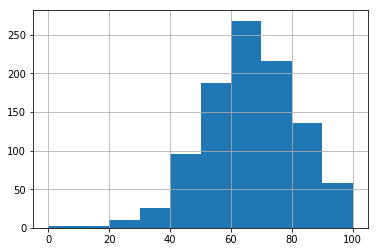

In [8]:
students_perfomance['math score'].hist() #стандартный метод из Pandas
#распределение оценок по математики

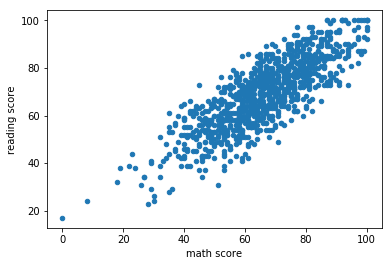

In [11]:
#график корреляции между двумя переменными
students_perfomance.plot.scatter(x='math score', y='reading score') #скаттер плот, по оси Х math score

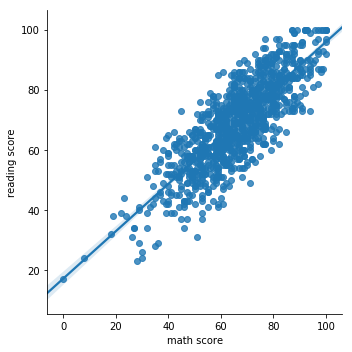

In [14]:
#Seaborn - надстройка над matplotlib
#облако точек, регрессионная прямая, которая показывает лининейную
#аппроксимацию взаимосвязи двух переменных
sns.lmplot(x='math score', y='reading score', data=students_perfomance)

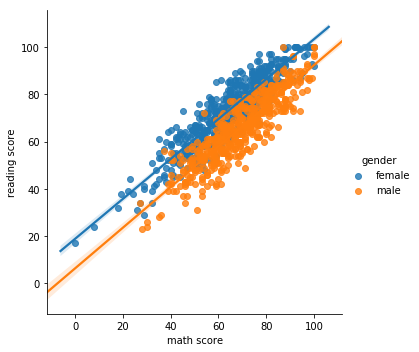

In [15]:
#добавим группирующую переменную, и тогда
sns.lmplot(x='math score', y='reading score', hue='gender', data=students_perfomance)

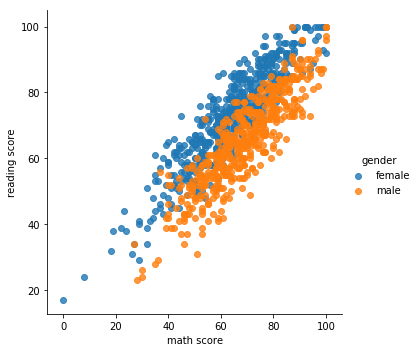

In [17]:
sns.lmplot(x='math score', y='reading score', hue='gender', data=students_perfomance, fit_reg=False)

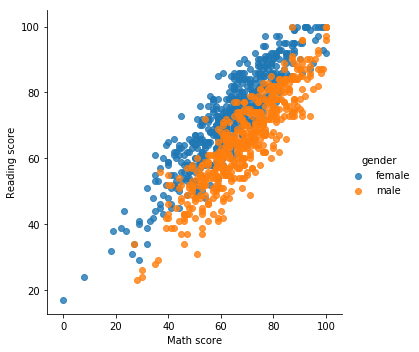

In [18]:
ax = sns.lmplot(x='math score', y='reading score', hue='gender', data=students_perfomance, fit_reg=False)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')

#### Задача из модуля (шаг - 5)

Представьте, что у вас есть [датафрэйм][1] __df__, хранящий данные о зарплате за месяц, со всего 1-ой колонкой __income__.

Укажите верные способы, как отрисовать простой график зависимости зарплаты от даты (то, как отображается дата сейчас не важно, главное сам график)

Убедитесь, что вы используте версию seaborn > = 0.9.

[1]: https://stepik.org/media/attachments/course/4852/income.csv

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://stepik.org/media/attachments/course/4852/income.csv')

In [22]:
df.head()

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


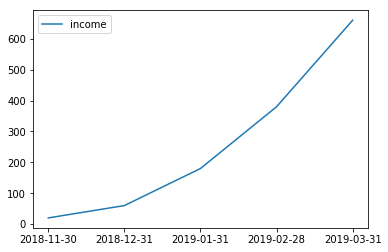

In [27]:
sns.lineplot(data=df)

#### Задача из модуля (шаг - 6)

Вам дан датасэт с 2-мя фичами (колонками). Постройте график распределения точек (наблюдений) в пространстве этих 2-ух переменных (одна из них будет x, а другая - y) и напишите число кластеров, формируемых наблюдениями.

В ответе вы должны указать число кластеров в виде числа (например: 3).

У вас есть неограниченное число попыток.
__Время одной попытки__: 5 mins

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv('datasets_ml_stepik/dataset_1-7-6.txt', sep=r"\s+")
df.head()

,x,y
0,894.927646,205.129027
1,605.804957,1101.988823
2,997.963934,1406.187134
3,898.554240,200.312598
4,595.475078,1107.213419


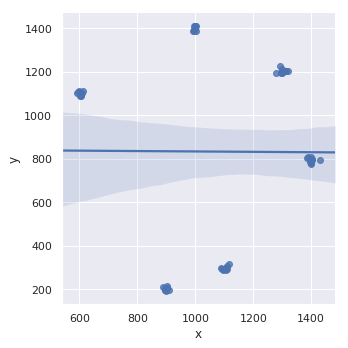

In [56]:
sns.lmplot(x='x', y='y', data=df)

#### Задача из модуля (шаг - 7)

Скачайте [данные][1], представляющие геномные расстояния между видами, и постройте тепловую карту, чтобы различия было видно наглядно. В ответ впишите, какая картинка соответствует скачанным данным.

Чтобы график отображался как на картинках, добавьте
```python
g = # ваш код для создания теплокарты, укажите параметр cmap=viridis для той же цветовой схемы
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)
```

Вариант 1:

!["image1"](https://ucarecdn.com/c3a64c11-6416-401b-ad27-e43b82fd99be/)

[1]: https://stepik.org/media/attachments/course/4852/genome_matrix.csv

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://stepik.org/media/attachments/course/4852/genome_matrix.csv', index_col=0)
#в первом столбце есть специальная ошибка, "запятая"

In [71]:
df.head()

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


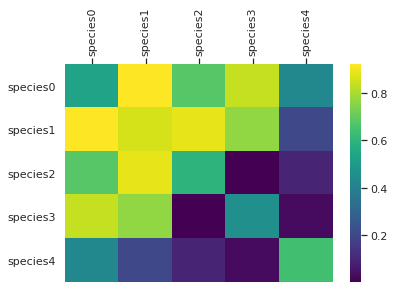

In [72]:
g = sns.heatmap(data=df, cmap='viridis')
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

#### Задача из модуля (шаг - 8)

Пришло время узнать, ~~кто самый главный рак~~ какая роль в dota самая распространённая. Скачайте [датасэт][3] с данными о героях из игры dota 2 и посмотрите на распределение их возможных ролей в игре (колонка roles). Постройте гистограмму, отражающую скольким героям сколько ролей приписывается (по мнению Valve, конечно) и напишите какое число ролей у большинства героев.

Это задание можно выполнить многими путями, и рисовать гистограмму вообще говоря для этого не нужно.

Данные взяты [отсюда][1], на этом же [сайте][2] можно найти больше разнообразных данных по dota 2

[1]: https://api.opendota.com/api/heroes
[2]: https://www.opendota.com/
[3]: https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv', index_col=0)

In [12]:
#eval - исполняет выражение, т.е. если список идет как строка, то после выполнения получаем обычный список
df['roles_cnt'] = df['roles'].apply(lambda x: len(eval(x)))
df.head()

,attack_type,id,legs,localized_name,name,primary_attr,roles,roles_cnt
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']",3
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']",4
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']",4
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini...",5
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']",4


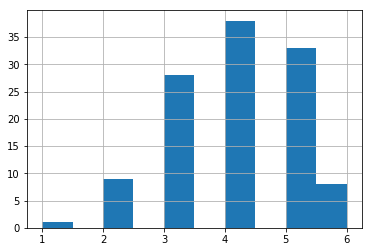

In [13]:
df['roles_cnt'].hist()

#### Задача из модуля (шаг - 9)

Теперь перейдём к [цветочкам][1]. Магистрантка Адель решила изучить какие бывают ирисы. Помогите Адель узнать об ирисах больше - скачайте датасэт со значениями параметров ирисов, постройте их распределения и отметьте правильные утверждения, глядя на график.

Распределение должно быть по всем образцам, без разделения на вид.
Чтобы построить на 1-ом графике распределения для каждого из параметров, можно воспользоваться петлёй
```python
for column in df:
    # Draw distribution with that column
```
Ссылки для изучения:

[kdeplot][2]

[distplot][3]

[1]: https://stepik.org/media/attachments/course/4852/iris.csv
[2]: https://seaborn.pydata.org/generated/seaborn.kdeplot.html
[3]: https://seaborn.pydata.org/generated/seaborn.distplot.html

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv', index_col=0)

In [2]:
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
df.max()


sepal length    7.9
sepal width     4.4
petal length    6.9
petal width     2.5
species         2.0
dtype: float64

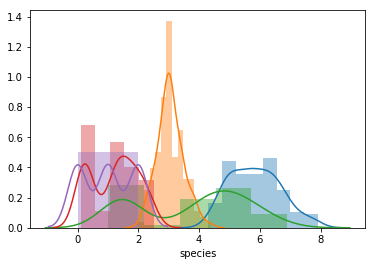

In [19]:
for c in df:
    sns.distplot(df[c])

In [18]:
df.min()

sepal length    4.3
sepal width     2.0
petal length    1.0
petal width     0.1
species         0.0
dtype: float64

#### Задача из модуля (шаг - 10)

Рассмотрим длину лепестков (__petal length__) подробнее и воспользуемся для этого violin плотом. 
Нарисуйте распределение длины лепестков ирисов из [предыдущего датасэта с помощью][1] violin плота и выберите правильный (такой же) вариант среди предложенных

[Мануал по рисованию violin плотов][2]

[1]: https://stepik.org/media/attachments/course/4852/iris.csv
[2]: https://seaborn.pydata.org/generated/seaborn.violinplot.html

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv', index_col=0)

In [13]:
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


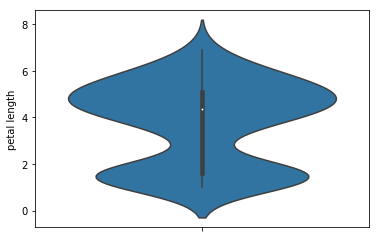

In [16]:
sns.violinplot(y='petal length', data=df)

#### Задача из модуля (шаг - 11)

Продолжаем изучение ирисов! Ещё один важный тип графиков - pairplot, отражающий зависимость пар переменных друг от друга, а также распределение каждой из переменных. Постройте его и посмотрите на scatter плоты для каждой из пар фичей. Какая из пар навскидку имеет наибольшую корреляцию?

Также обратите внимание, что можно разделить на группы с помощью параметра __hue__.

Ссылки для изучения:

[pairplot][2]

__Tips:__
>Напоминание: если совсем просто, то "коррелируют" == "меняются одинаково". Т.е. две величины *коррелируют* между собой, если *изменение одной величины влечёт такое же изменение другой*. Значит чем сильнее корреляция между двумя величинами $x$ и $y$, тем меньше точки отклоняются от прямой $y=x$.

[1]: https://stepik.org/media/attachments/course/4852/iris.csv
[2]: https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv', index_col=0)

In [18]:
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


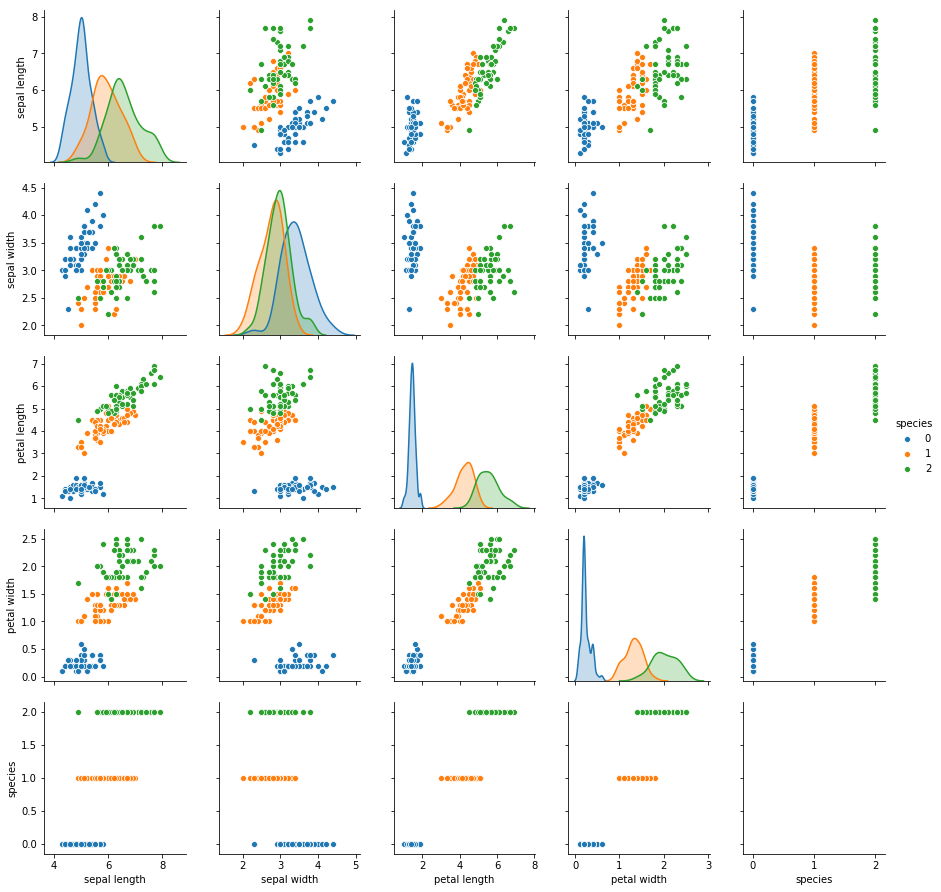

In [25]:
sns.pairplot(df, hue='species')
#результат petal length and petal width

## Практические задания Pandas

In [26]:
import pandas as pd

df = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')

In [27]:
df.head()

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0


In [28]:
subset_1 = df.iloc[:10, [0, 2]]
subset_1

,V1,V3
0,2,B
1,-1,B
2,0,A
3,2,A
4,0,B
5,2,A
6,0,A
7,1,A
8,0,B
9,-1,A


In [37]:
not_subset_2 = df.index.isin([1, 4])
subset_2 = df.iloc[~not_subset_2, [1,3]]
subset_2.head()

,V2,V4
0,13.0,1.0
2,11.0,0.0
3,11.0,2.0
5,11.0,0.0
6,9.0,2.0


In [38]:
import pandas as pd

df = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')

In [39]:
df.head()

,session_value,time,group,n_users
0,0.0,12,B,9
1,NaN,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9


In [57]:
df2 = df.fillna(0)

In [58]:
df2.head()

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9


In [59]:
mean_positive_n_users = df2.query('n_users >= 0')['n_users'].median()
mean_positive_n_users


5.0

In [60]:
df2.loc[df2['n_users'] < 0, 'n_users'] = mean_positive_n_users
df2

,session_value,time,group,n_users
0,0.0,12,B,9.0
1,0.0,11,A,5.0
2,1.0,8,A,1.0
3,2.0,9,B,3.0
4,2.0,10,B,9.0
5,3.0,8,A,8.0
6,0.0,11,B,5.0
7,0.0,9,A,4.0
8,0.0,8,B,5.0
9,0.0,9,A,5.0


### Stepik ML-Contest

Практическим проектом нашего курса будет анализ активности студентов онлайн курса [Введение в анализ данных в R][1], спасибо команде stepik, что предоставили анонимизированные данные.

В этом модуле, мы разберемся с задачей, начнем исследовать данные, а об условиях соревнований, призах и тайных стэпах раскажу во втором модуле!

Описание данных:

[events_train.csv][2] - данные о действиях, которые совершают студенты со стэпами

1. __step_id__ - id стэпа
2. __user_id__ - анонимизированный id юзера
3. __timestamp__ - время наступления события в формате unix date
4. __action__ - событие, возможные значения: 


- discovered - пользователь перешел на стэп
- viewed - просмотр шага,
- started_attempt - начало попытки решить шаг, ранее нужно было явно нажать на кнопку - начать решение, перед тем как приступить к решению практического шага
- passed - удачное решение практического шага

[submissions_train.csv][3] - данные о времени и статусах сабмитов к практическим заданиям

1. __step_id__ - id стэпа
2. __timestamp__ - время отправки решения в формате unix date
3. __submission_status__ - статус решения
4. __user_id__ - анонимизированный id юзера

[1]: https://stepik.org/course/129/syllabus
[2]: https://stepik.org/media/attachments/course/4852/event_data_train.zip
[3]: https://stepik.org/media/attachments/course/4852/submissions_data_train.zip

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#чтение zip архива
events_data = pd.read_csv('datasets_ml_stepik/event_data_train.zip', compression ='zip')

In [3]:
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [4]:
#timestamp - это Unix time. Секунды от 01.01.1970



In [5]:
#самый важный этап, проверить что данные валидные
#например посмотрим какие вообще есть значения в action

events_data['action'].unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [6]:
#преобразуем данные так, чтобы видеть всю картину

#переведем timestamp в обычный вид
events_data['date'] = pd.to_datetime(events_data['timestamp'], unit='s')

In [7]:
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [8]:
events_data.dtypes

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object

In [9]:
events_data['date'].min()

Timestamp('2015-06-15 04:00:48')

In [10]:
events_data['date'].max()

Timestamp('2018-05-19 23:33:31')

In [11]:
events_data['day'] = events_data['date'].dt.date

In [12]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


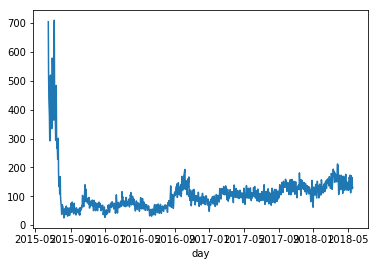

In [13]:
events_data.groupby('day')\
    .user_id.nunique().plot()

In [14]:
#увеличим график, чтобы даты непересикались

sns.set(rc={'figure.figsize': (9, 6)})

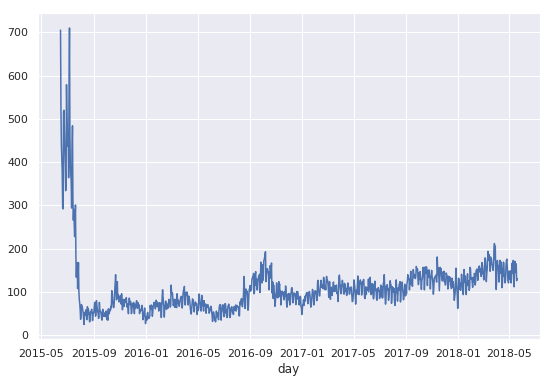

In [15]:
events_data.groupby('day')\
    .user_id.nunique().plot()

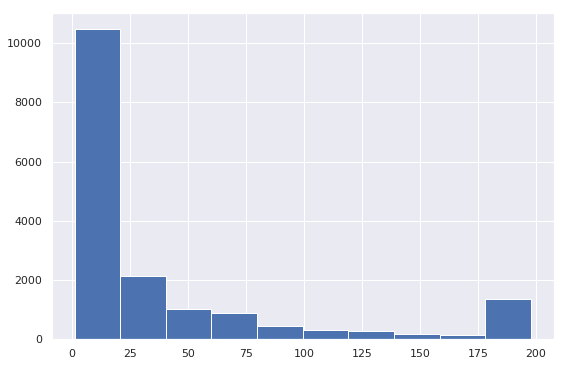

In [16]:
#посмотрим как распределены по количеству баллов которые они набрали

#НЕПРАВИЛЬНОЕ решение
events_data[events_data.action == 'passed'] \
    .groupby('user_id', as_index=False) \
    .agg({'step_id': 'count'})\
    .rename(columns={'step_id': 'passed_steps'}).passed_steps.hist()

In [17]:
#Что не так с нашими расчетами сумарного количества пройденных стэпов?

#Ответ - Пользователи, у которых нет ни одного passed стэпа вообще не попадут в результат

#Проверять данные - к примеру количество пользователей
#Правильное решение

events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0)\
    .reset_index().head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [18]:
events_data_table = events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0)\
    .reset_index()

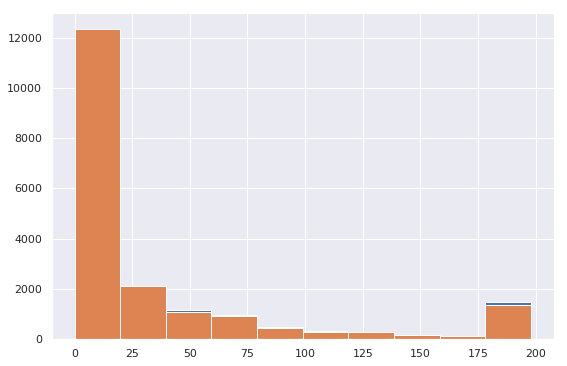

In [19]:
events_data_table.discovered.hist()
events_data_table.passed.hist()

In [21]:
#число пройденных степов можем посмотреть по другому

submissions_data = pd.read_csv('datasets_ml_stepik/submissions_data_train.zip')

In [23]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [24]:
submissions_data['date'] = pd.to_datetime(submissions_data['timestamp'], unit='s')

In [27]:
submissions_data['day'] = submissions_data['date'].dt.date

In [28]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [73]:
#для каждого user посчитаем сколько у него было correct submit
users_scores = submissions_data.pivot_table(index='user_id',
                            columns='submission_status',
                            values='step_id',
                            aggfunc='count',
                            fill_value=0).reset_index().head()

In [40]:
#посмотрим распределение перерывов у пользователей

gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).values

In [42]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))

In [45]:
gap_data = gap_data / (24 * 60 * 60)

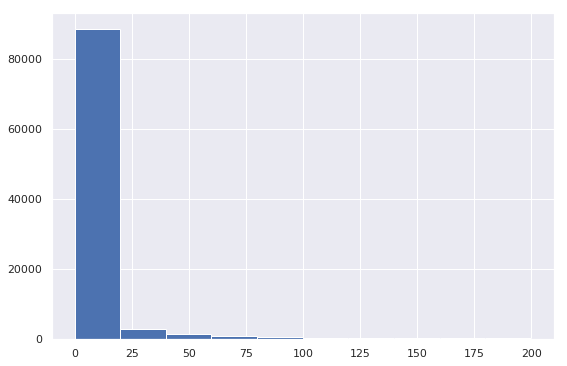

In [48]:
gap_data[gap_data < 200].hist()
#большая часть пользователей вкладывается в промежуток 0-25 дней

In [50]:
gap_data.quantile(0.90) #только 10% пользователей возвращаются на курс после перерыва в 2 месяца.

18.325995370370403

In [69]:
now = 1526772811
drop_out_threshold = 259200 #30 дней

In [67]:
users_data = events_data.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'max'}).rename(columns={'timestamp': 'last_timestamp'})

In [70]:
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threshold

In [71]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [76]:
users_data = users_data.merge(users_scores, on='user_id', how='outer').fillna(0)

In [78]:
users_data = users_data.merge(events_data_table, how='outer', on='user_id')

In [79]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1


In [81]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [84]:
users_data = users_data.merge(users_days, how='outer', on='user_id')

In [88]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [86]:
users_data.user_id.nunique()

19234

In [87]:
events_data.user_id.nunique()

19234

In [89]:
users_data['passed_corse'] = users_data.passed > 170

In [90]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_corse
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [91]:
users_data.groupby('passed_corse').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_corse,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [93]:
(100 * 1425) / (1425 + 17809) #столько процентов пользователей прошло курс

7.408755329104711

In [94]:
events_data.

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [62]:
#id - Карпова
events_data.pivot_table(index='user_id',
                            columns='action',
                            values='step_id',
                            aggfunc='count',
                            fill_value=0).reset_index().sort_values('started_attempt', ascending=False).head()

action,user_id,discovered,passed,started_attempt,viewed
781,1046,128,124,721,8122
2611,3572,194,193,550,6968
6062,8394,131,94,337,1070
4825,6662,198,197,285,1054
1204,1649,194,194,281,807


Обязательно запомните [типы merge и join][1], это справделиво не только для Pandas, но и для работы с базами данных.

[1]: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

![1](https://ucarecdn.com/f03da508-b426-42c6-be37-ccd7627ca8a4/)
![2](https://ucarecdn.com/4614d509-542e-44ca-ad74-ca27b78ad787/)